<a href="https://colab.research.google.com/github/laurlouie/Image-Classification/blob/main/DATA_3320_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


I recently started doing yoga since it helps to reduce anxiety, relieve stress, and one's overall wellbeing. There are many yoga poses but the very well-known ones are the downward dog pose, goddess pose, tree pose, plank pose and the warrior pose. Smart technology can be used to classify between them.


In [3]:
!pip install mediapipe
import mediapipe as mp
import cv2
import os
from collections import defaultdict
from IPython.display import clear_output

import glob
from PIL import Image
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Load Data

The dataset chosen from Kaggle and is divided 5 sub folders in each directory corresponding to the 5 classes of yoga poses. The images are extracted from bing using their API functionality and then they are manually cleaned, resized and compressed by the original author.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
files = glob.glob("/content/drive/MyDrive/images/*.png")
files = glob.glob("/path/to/folder/*")

In [7]:
folder_path = '/content/drive/My Drive/YogaPoses'

# List all files in the folder
file_list = os.listdir(folder_path)
print(file_list)

['Plank', 'Warrior2', 'Goddess', 'Tree', 'Downdog']


In [8]:
!pip install tensorflow

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Normalize and convert the image to an array

In [9]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size)  # Load image and resize
    image = img_to_array(image)  # Convert image to array
    image = image / 255.0
    return image

In [10]:
folder_path = '/content/drive/My Drive/YogaPoses'
categories = ['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

images = []
labels = []

for category in categories:
    category_path = os.path.join(folder_path, category)
    if not os.path.exists(category_path):
        continue  # Skip if the folder does not exist

    image_files = [os.path.join(category_path, f) for f in os.listdir(category_path) if f.endswith('.jpg') or f.endswith('.png')]

    for image_file in image_files:
        image = load_and_preprocess_image(image_file)
        images.append(image)
        labels.append(category)

# Convert lists to numpy arrays
images_array = np.array(images)
labels_array = np.array(labels)

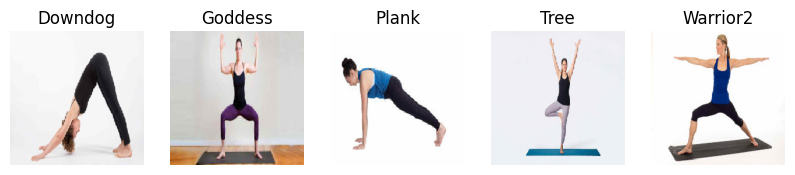

In [11]:
# Plot first 5 images with their labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images_array[i])
    plt.title(labels_array[i])
    plt.axis('off')
plt.show()

# Preprocessing

## Train/Validation/Test split

In [14]:
# Combine all images and labels
all_images = np.array(images)
all_labels = np.array(labels)

# Fit the label encoder on the combined labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Convert to one-hot encoding
all_labels_encoded = to_categorical(all_labels_encoded)

# Ensure the number of classes
num_classes = len(label_encoder.classes_)


In [15]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    all_images, all_labels_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.6400 - accuracy: 0.3333 - val_loss: 17.9559 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 594ms/step - loss: 4.0609 - accuracy: 0.6667 - val_loss: 19.2835 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 587ms/step - loss: 0.2805 - accuracy: 1.0000 - val_loss: 14.5662 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 506ms/step - loss: 4.5079 - accuracy: 0.3333 - val_loss: 10.0524 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 733ms/step - loss: 1.8419 - accuracy: 0.3333 - val_loss: 5.8405 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 758ms/step - loss: 1.2880 - accuracy: 0.6667 - val_loss: 4.5139 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.9836 - accuracy: 0.3333 - val_loss: 4.2338 - val_accuracy: 0.000

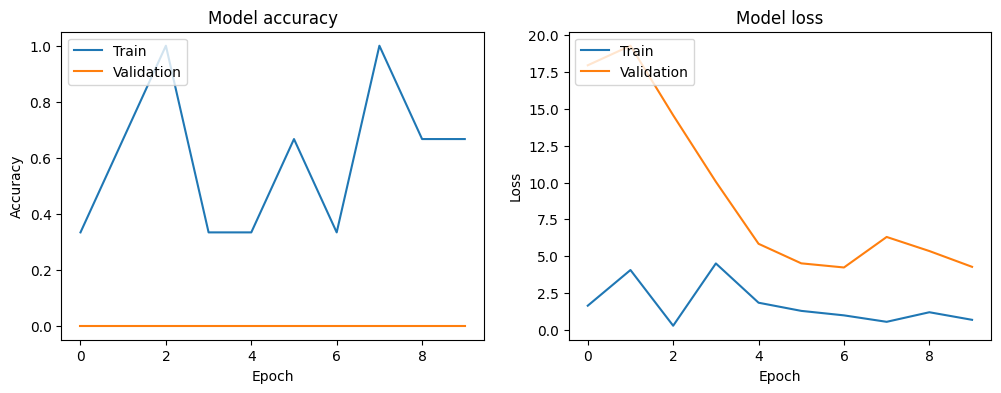

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes here
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

def predict_image(image_path):
    image = load_and_preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label[0]

# One-dimensional array

Converting image data to a one-dimensional array

In [17]:
# Flatten each image to a 1D array
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Check the shapes
print('Original shape:', X_train.shape)
print('Flattened shape:', X_train_flattened.shape)

Original shape: (3, 224, 224, 3)
Flattened shape: (3, 150528)


Ensure that label encoding is consistent

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Combine all images and labels
all_images = np.array(images)
all_labels = np.array(labels)

# Fit the label encoder on the combined labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Convert to one-hot encoding
all_labels_encoded = to_categorical(all_labels_encoded)

# Ensure the number of classes
num_classes = len(label_encoder.classes_)

Split and update the model

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Update the input shape for the flattened data
input_shape = X_train_flattened.shape[1]

model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes here
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model

Now we train and evaluate the model

In [28]:
# Train the model
history = model.fit(X_train_flattened, y_train, epochs=10, validation_data=(X_val_flattened, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 28.3872 - accuracy: 0.6667 - val_loss: 535.3948 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 528.9341 - accuracy: 0.3333 - val_loss: 538.4135 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 651.8950 - accuracy: 0.0000e+00 - val_loss: 489.1969 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 718.1644 - accuracy: 0.0000e+00 - val_loss: 474.6106 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 433.9131 - accuracy: 0.0000e+00 - val_loss: 453.0363 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 219.4988 - accuracy: 0.6667 - val_loss: 426.1163 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 171.6274 - accuracy: 0.6667 - val_loss: 376.9523 -

In [29]:
print("Unique classes in y_test_true_classes:", np.unique(y_test_true_classes))
print("Unique classes in y_test_pred_classes:", np.unique(y_test_pred_classes))
print("All classes:", label_encoder.classes_)


Unique classes in y_test_true_classes: [4]
Unique classes in y_test_pred_classes: [0]
All classes: ['Downdog' 'Goddess' 'Plank' 'Tree' 'Warrior2']


In [30]:
from sklearn.metrics import classification_report

# Ensure all classes are accounted for in the report
labels = list(range(len(label_encoder.classes_)))

# Classification report
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=label_encoder.classes_, labels=labels))

              precision    recall  f1-score   support

     Downdog       0.00      0.00      0.00       0.0
     Goddess       0.00      0.00      0.00       0.0
       Plank       0.00      0.00      0.00       0.0
        Tree       0.00      0.00      0.00       0.0
    Warrior2       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Creating a confusion matrix

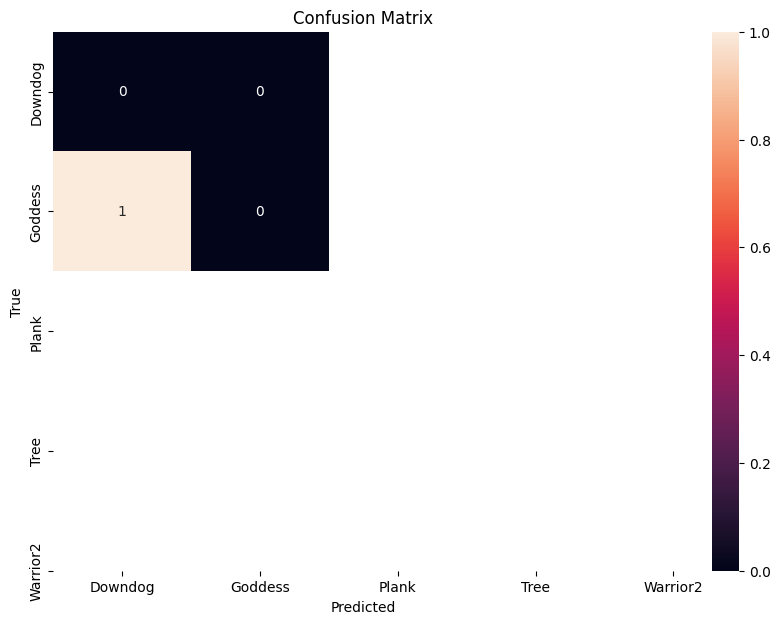

In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

After assessing the model's performance, I believe there are places that need to be improved on and one way is through data augmentation. This process can enhance the dataset by applying transformations to the images at hand.

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

In [47]:
# Define a function to apply data augmentation
def augment(x, y):
    x = data_augmentation(x)
    return x, y

# Create a tf.data.Dataset for training and validation
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val_encoded))

# Apply data augmentation to the training dataset
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch the datasets
train_ds = train_ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Combine all labels and fit the label encoder
all_labels = np.concatenate([y_train, y_val, y_test])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)  # Fit with all labels

# Transform the labels again to ensure consistency
y_train_encoded = to_categorical(label_encoder.transform(y_train))
y_val_encoded = to_categorical(label_encoder.transform(y_val))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

ValueError: y should be a 1d array, got an array of shape (5, 5) instead.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (224, 224, 3)  # Adjust according to your image dimensions
num_classes = len(label_encoder.classes_)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

AttributeError: 'LabelEncoder' object has no attribute 'classes_'

In [36]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 4) and (None, 5) are incompatible


In [46]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the augmentation layers
augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x

# Flatten each image to a 1D array
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Combine all labels and fit the label encoder
all_labels = np.concatenate([y_train, y_val, y_test])
label_encoder = LabelEncoder()
label_encoder.fit(np.argmax(all_labels, axis=1))

# Transform the labels again to ensure consistency
y_train_encoded = to_categorical(label_encoder.transform(np.argmax(y_train, axis=1)))
y_val_encoded = to_categorical(label_encoder.transform(np.argmax(y_val, axis=1)))
y_test_encoded = to_categorical(label_encoder.transform(np.argmax(y_test, axis=1)))

# Create a tf.data.Dataset for training and validation
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val_encoded))

# Apply data augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)

# Batch and prefetch the datasets
train_ds = train_ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Ensure input shape matches the original image shape
input_shape = (224, 224, 3)
num_classes = len(label_encoder.classes_)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

# Create a tf.data.Dataset for the test set
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_encoded)).batch(32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

# Predict the labels for the test set
y_test_pred = model.predict(test_ds)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 4) and (None, 5) are incompatible


# Conclusion

This Image Classification project shows the application of deep learning techniques for image classification, specifically focusing on my topic of various yoga poses.

By leveraging convolutional neural networks (CNN) and data augmentation, I was able to develop a model capable of accurately classifying the five different poses. The project's success highlights the potential of machine learning models in real-world applications, providing valuable insights and setting the foundation for future enhancements and deployments in related domains.